In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Pre_processing_models import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler 
from sklearn.inspection import permutation_importance

from functions.Pre_processing_Casos_Graves import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#### Lendo o dataset:

In [2]:
df = pd.read_csv(r'C:\Users\maril\OneDrive\Área de Trabalho\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

#### Utilizando a class de pré-processamento para preparar o dataset:

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [4]:
Pre_processing_models_df = Pre_processing_models(df)
Pre_processing_models_df.run_graves()

df = Pre_processing_models_df.df
df = df[list_features]
df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])
df = df.sort_values(by='data_notificacao', ascending=True)
df = df.reset_index()
df = df.drop("index", axis=1)
df

C:\Users\maril\AppData\Local\Temp\ipykernel_28496\3432879523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-12
36431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,0,1,2022-06-12
36432,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2022-06-12
36433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-13


### Criação de uma função para configuração do modelo:

In [5]:
from sklearn.svm import SVC

def instantiate_SVC_model (X_train, y_train):
    param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'sigmoid']}
    

    # Init classifier
    svc_cl = SVC()

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(svc_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

### Criação de uma função para aplicação do modelo:

In [6]:
def apply_model_svc(df):
    list_random_states = [42]

    mean_test_scores = []
    std_test_scores = []
    best_scores = []
    best_params = []

    #treino!
    data_inicio = df['data_notificacao'][0]
    data_fim = df['data_notificacao'][0]+pd.Timedelta(days=45)
    
    treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim )]
    X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
    y_train = treino['death']

    #teste!
    teste = df[(df['data_notificacao'] > data_fim)]
    X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
    y_test = teste['death']

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)


    for random_state in list_random_states:

        mean_test_score, std_test_score, best_score, best_param = instantiate_SVC_model(X_over, y_over)

        mean_test_scores.append(mean_test_score)
        std_test_scores.append(std_test_score)
        best_scores.append(best_score)
        best_params.append(best_param)

    return (X_over, y_over, X_test, y_test, mean_test_scores, std_test_scores, best_scores, best_params)

### Criação de uma função para imprimir as métricas do classificador final de cada modelo:

In [7]:
from sklearn.svm import SVC

def create_final_cl(X_over, y_over, X_test, y_test, C, gamma, kernel):

    # parametrizando o modelo final
    final_cl = SVC(C=C, gamma=gamma, kernel=kernel)
    #final_cl = make_pipeline(StandardScaler(), SVC(C=C, gamma=gamma, kernel=kernel))
    #treinando o modelo final
    final_cl.fit(X_over, y_over)
    preds = final_cl.predict(X_test)
    accuracy_score(y_test, preds)

    print('accuracy_score:', accuracy_score(y_test, preds))
    print('#'*40)

    print('"""Métricas f1_score:"""')
    print('f1: ', f1_score(y_test, preds))
    print('Macro: ', f1_score(y_test, preds, average='macro'))
    print('Micro: ', f1_score(y_test, preds, average='micro'))
    print('weighted: ', f1_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""Métricas precision_score:"""')
    print('Precision: ', precision_score(y_test, preds))
    print('Macro: ', precision_score(y_test, preds, average='macro'))
    print('Micro: ', precision_score(y_test, preds, average='micro'))
    print('weighted: ', precision_score(y_test, preds, average='weighted'))

    return preds, final_cl

### Criação de funções para gerar a matriz de confusão e classification report:

In [8]:
def plot_conf_matrix (X_test, y_test, preds, final_cl):

    confusion_matrix(y_test, preds)
    matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, preds))


def plot_roc_curve(y_test, preds):
    
    print('roc_auc_score: ', roc_auc_score(y_test, preds, multi_class='ovr'))

    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

#### Criação de uma função para determinar os atributos mais importantes do modelo:

In [59]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

### Teste com o Período 1 (26/02/2020 até 25/05/2020):

In [9]:
#Periodo 1
data_inicio = df['data_notificacao'][0]
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=90)

df_1 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim)]
df_1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.400000,0,1,2020-05-25
10819,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.626087,0,1,2020-05-25
10820,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.704348,1,0,2020-05-25
10821,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.782609,0,1,2020-05-25


In [10]:
X_train_oversampled_1, y_train_oversampled_1, X_test_1, y_test_1, mean_test_scores_1, std_test_scores_1, best_scores_1, best_params_1 = apply_model_svc(df_1)

########################################

best_score: 0.908765375178248
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [11]:
preds_1, final_cl_1 = create_final_cl(X_train_oversampled_1, y_train_oversampled_1, X_test_1, y_test_1, 10, 0.1, 'rbf')

accuracy_score: 0.7433874709976798
########################################
"""Métricas f1_score:"""
f1:  0.5951683748169839
Macro:  0.7036643504519702
Micro:  0.7433874709976797
weighted:  0.7622924542231727
########################################
"""Métricas precision_score:"""
Precision:  0.46683893195521103
Macro:  0.6988662247862487
Micro:  0.7433874709976798
weighted:  0.8242470983369415


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


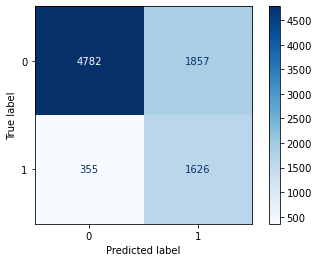

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      6639
           1       0.47      0.82      0.60      1981

    accuracy                           0.74      8620
   macro avg       0.70      0.77      0.70      8620
weighted avg       0.82      0.74      0.76      8620



In [12]:
plot_conf_matrix (X_test_1, y_test_1, preds_1, final_cl_1)

roc_auc_score:  0.7705433885810364


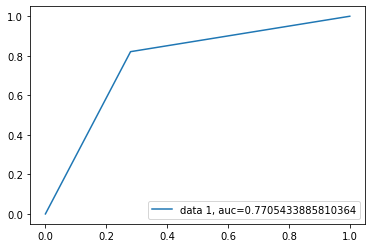

In [13]:
plot_roc_curve(y_test_1, preds_1)

Feature: 0, Score: -0.00459
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03458
Feature: 3, Score: -0.00102
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00838
Feature: 8, Score: 0.00143
Feature: 9, Score: 0.00156
Feature: 10, Score: 0.00079
Feature: 11, Score: 0.00264
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00145
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00008
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00505
Feature: 21, Score: 0.00166
Feature: 22, Score: 0.00008
Feature: 23, Score: 0.00171
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00057
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.00013
Feature: 30, Score: 0.21083
Feature: 31, Score: -0.00212
Feature: 32, Score: -0.00212


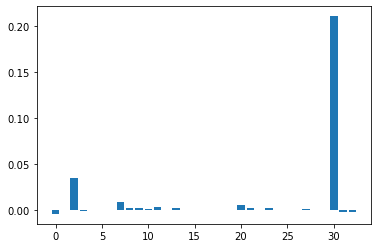

In [15]:
# perform permutation importance
results = permutation_importance(final_cl_1, X_train_oversampled_1, y_train_oversampled_1, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

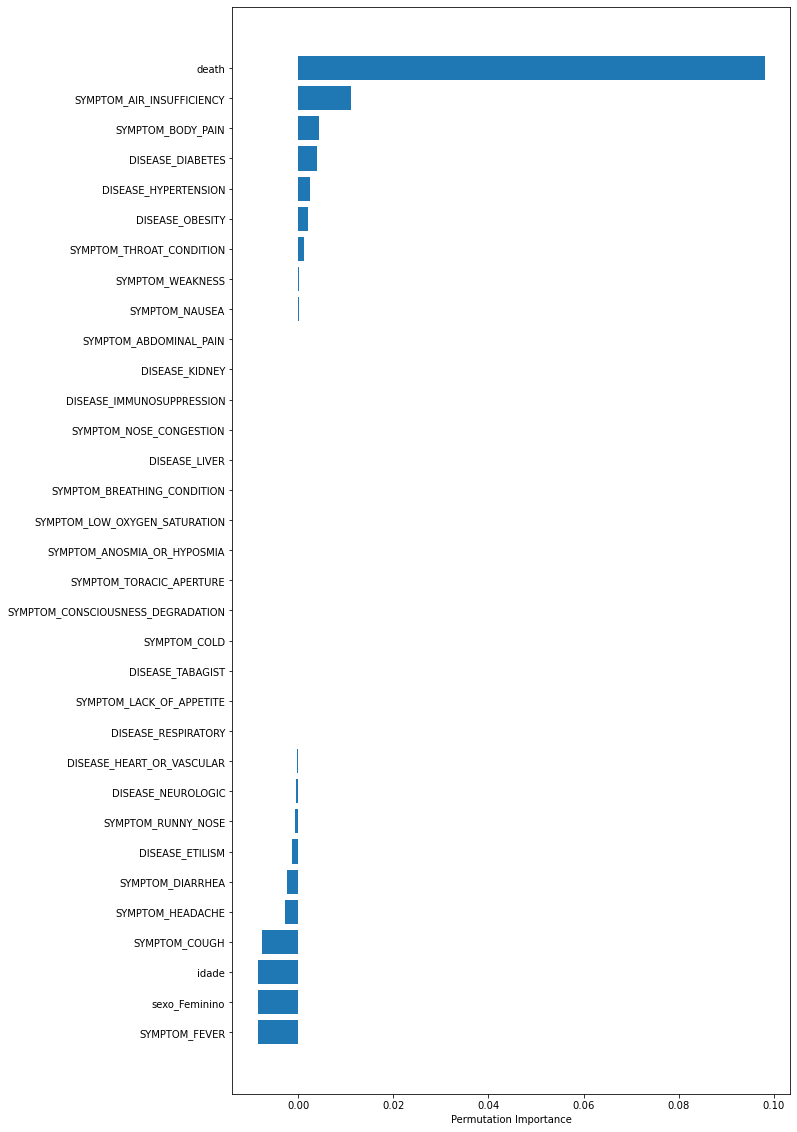

In [68]:
perm_importance = permutation_importance(final_cl_1, X_test_1, y_test_1)

feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 2 (27/03/2020 até 24/06/2020):

In [16]:
#Periodo 2
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=30)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=120)

df_2 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_2 = df_2.reset_index()
df_2 = df_2.drop("index", axis=1)
df_2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.730435,1,0,2020-03-27
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,0,1,2020-03-27
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.504348,0,1,2020-03-27
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,1,0,2020-03-27
4,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.286957,1,0,2020-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12581,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.356522,1,0,2020-06-24
12582,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.095652,1,0,2020-06-24
12583,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.226087,1,0,2020-06-24
12584,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.313043,0,1,2020-06-24


In [17]:
X_train_oversampled_2, y_train_oversampled_2, X_test_2, y_test_2, mean_test_scores_2, std_test_scores_2, best_scores_2, best_params_2 = apply_model_svc(df_2)

########################################

best_score: 0.9031222517570526
best_params_: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [18]:
preds_2, final_cl_2 = create_final_cl(X_train_oversampled_2, y_train_oversampled_2, X_test_2, y_test_2, 10, 0.1, 'rbf')

accuracy_score: 0.6470218120805369
########################################
"""Métricas f1_score:"""
f1:  0.566348879154857
Macro:  0.634368073529683
Micro:  0.6470218120805369
weighted:  0.6654674535081062
########################################
"""Métricas precision_score:"""
Precision:  0.4248163896405102
Macro:  0.6677039307212179
Micro:  0.6470218120805369
weighted:  0.7787557007623134


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


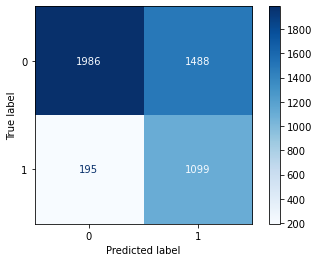

              precision    recall  f1-score   support

           0       0.91      0.57      0.70      3474
           1       0.42      0.85      0.57      1294

    accuracy                           0.65      4768
   macro avg       0.67      0.71      0.63      4768
weighted avg       0.78      0.65      0.67      4768



In [19]:
plot_conf_matrix (X_test_2, y_test_2, preds_2, final_cl_2)

roc_auc_score:  0.7104898922354537


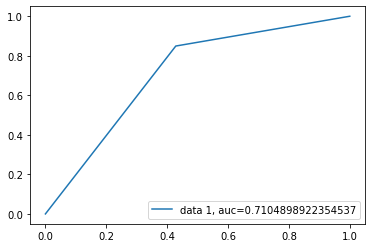

In [20]:
plot_roc_curve(y_test_2, preds_2)

In [21]:
df_2.corr()

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
SYMPTOM_COUGH,1.000000,0.014524,0.212030,0.355365,NaN,-0.004789,-0.001225,0.159992,0.035449,0.046611,...,0.000748,0.006536,0.011874,0.016412,NaN,-0.003896,0.004059,0.018078,-0.015874,0.016309
SYMPTOM_COLD,0.014524,1.000000,0.002598,0.006283,NaN,-0.001392,-0.001584,0.037962,0.036483,0.055356,...,-0.000826,-0.000337,-0.002684,-0.002366,NaN,-0.003570,-0.015204,-0.022654,0.009822,-0.009810
SYMPTOM_AIR_INSUFFICIENCY,0.212030,0.002598,1.000000,0.146941,NaN,0.030714,0.010499,-0.122341,-0.074814,-0.000226,...,0.008796,0.009547,0.046623,0.036264,NaN,0.034585,0.261275,0.239123,-0.074892,0.075191
SYMPTOM_FEVER,0.355365,0.006283,0.146941,1.000000,NaN,0.004643,0.015955,0.093149,0.063650,0.090757,...,-0.003761,0.007510,-0.011072,0.008654,NaN,-0.006759,0.008777,-0.004283,-0.089190,0.089571
SYMPTOM_LOW_OXYGEN_SATURATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SYMPTOM_BREATHING_CONDITION,-0.004789,-0.001392,0.030714,0.004643,NaN,1.000000,-0.001539,-0.010459,-0.007385,0.003963,...,-0.000803,-0.000328,-0.002608,-0.002299,NaN,-0.003469,0.032310,0.012389,-0.009257,0.009269
SYMPTOM_TORACIC_APERTURE,-0.001225,-0.001584,0.010499,0.015955,NaN,-0.001539,1.000000,-0.014524,-0.004347,0.020765,...,-0.000914,-0.000373,-0.002968,0.027927,NaN,-0.003947,0.000459,0.002970,-0.010757,0.010770
SYMPTOM_THROAT_CONDITION,0.159992,0.037962,-0.122341,0.093149,NaN,-0.010459,-0.014524,1.000000,0.127890,0.016950,...,-0.003700,-0.004994,-0.034459,-0.011091,NaN,-0.044879,-0.176303,-0.197571,0.086490,-0.086314
SYMPTOM_HEADACHE,0.035449,0.036483,-0.074814,0.063650,NaN,-0.007385,-0.004347,0.127890,1.000000,0.264015,...,-0.008266,0.023552,-0.003039,-0.012100,NaN,-0.025433,-0.131062,-0.134137,0.050894,-0.050775
SYMPTOM_BODY_PAIN,0.046611,0.055356,-0.000226,0.090757,NaN,0.003963,0.020765,0.016950,0.264015,1.000000,...,-0.006752,0.028833,0.025949,-0.005764,NaN,-0.008082,-0.057883,-0.028414,0.000048,0.000051


Feature: 0, Score: 0.00561
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.04372
Feature: 3, Score: 0.00036
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00637
Feature: 8, Score: 0.00293
Feature: 9, Score: 0.00312
Feature: 10, Score: 0.00057
Feature: 11, Score: 0.00008
Feature: 12, Score: -0.00002
Feature: 13, Score: 0.00092
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00014
Feature: 16, Score: -0.00007
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00029
Feature: 19, Score: 0.00084
Feature: 20, Score: 0.03473
Feature: 21, Score: 0.00505
Feature: 22, Score: 0.00105
Feature: 23, Score: 0.00987
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00143
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00305
Feature: 30, Score: 0.17527
Feature: 31, Score: -0.00111
Feature: 32, Score: -0.00111


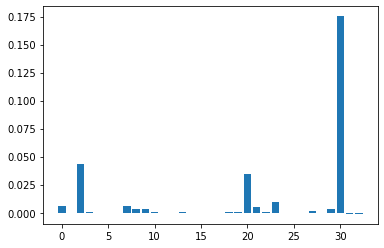

In [22]:
# perform permutation importance
results = permutation_importance(final_cl_2, X_train_oversampled_2, y_train_oversampled_2, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

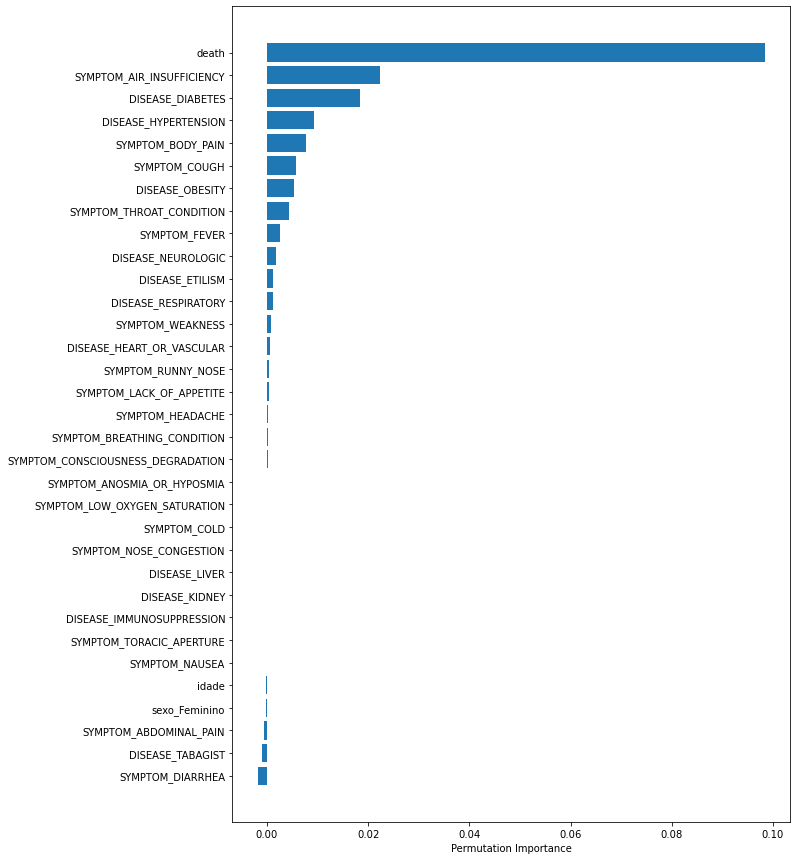

In [69]:
perm_importance = permutation_importance(final_cl_2, X_test_2, y_test_2)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 3 (26/04/2020 até 24/07/2020):

In [23]:
#Periodo 3
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=60)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=150)

df_3 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_3 = df_3.reset_index()
df_3 = df_3.drop("index", axis=1)
df_3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.652174,0,1,2020-04-26
1,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.443478,0,1,2020-04-26
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.782609,1,0,2020-04-26
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.747826,1,0,2020-04-26
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.452174,1,0,2020-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026087,0,1,2020-07-24
9581,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.834783,1,0,2020-07-24
9582,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.486957,0,1,2020-07-24
9583,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.339130,1,0,2020-07-24


In [24]:
X_train_oversampled_3, y_train_oversampled_3, X_test_3, y_test_3, mean_test_scores_3, std_test_scores_3, best_scores_3, best_params_3 = apply_model_svc(df_3)

########################################

best_score: 0.8330461610802304
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [25]:
preds_3, final_cl_3 = create_final_cl(X_train_oversampled_3, y_train_oversampled_3, X_test_3, y_test_3, 100, 0.1, 'rbf')

accuracy_score: 0.6512283527990335
########################################
"""Métricas f1_score:"""
f1:  0.48329355608591895
Macro:  0.6100358357937194
Micro:  0.6512283527990335
weighted:  0.6826714636729784
########################################
"""Métricas precision_score:"""
Precision:  0.35340314136125656
Macro:  0.6299551234106208
Micro:  0.6512283527990335
weighted:  0.7884462512625118


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


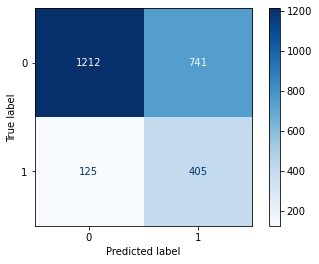

              precision    recall  f1-score   support

           0       0.91      0.62      0.74      1953
           1       0.35      0.76      0.48       530

    accuracy                           0.65      2483
   macro avg       0.63      0.69      0.61      2483
weighted avg       0.79      0.65      0.68      2483



In [26]:
plot_conf_matrix (X_test_3, y_test_3, preds_3, final_cl_3)

roc_auc_score:  0.6923673303770687


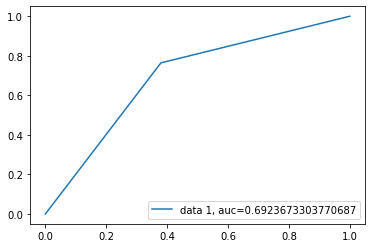

In [27]:
plot_roc_curve(y_test_3, preds_3)

Feature: 0, Score: 0.01435
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.03454
Feature: 3, Score: 0.00601
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00079
Feature: 6, Score: 0.00088
Feature: 7, Score: 0.00437
Feature: 8, Score: 0.00733
Feature: 9, Score: 0.00728
Feature: 10, Score: 0.00342
Feature: 11, Score: 0.00348
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00222
Feature: 14, Score: 0.00077
Feature: 15, Score: 0.00071
Feature: 16, Score: 0.00083
Feature: 17, Score: 0.00133
Feature: 18, Score: 0.00060
Feature: 19, Score: 0.00221
Feature: 20, Score: 0.03487
Feature: 21, Score: 0.01685
Feature: 22, Score: 0.00238
Feature: 23, Score: 0.00667
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00016
Feature: 26, Score: 0.00085
Feature: 27, Score: 0.00217
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00446
Feature: 30, Score: 0.11023
Feature: 31, Score: 0.00014
Feature: 32, Score: 0.00014


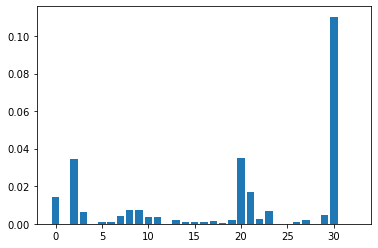

In [29]:
# perform permutation importance
results = permutation_importance(final_cl_3, X_train_oversampled_3, y_train_oversampled_3, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

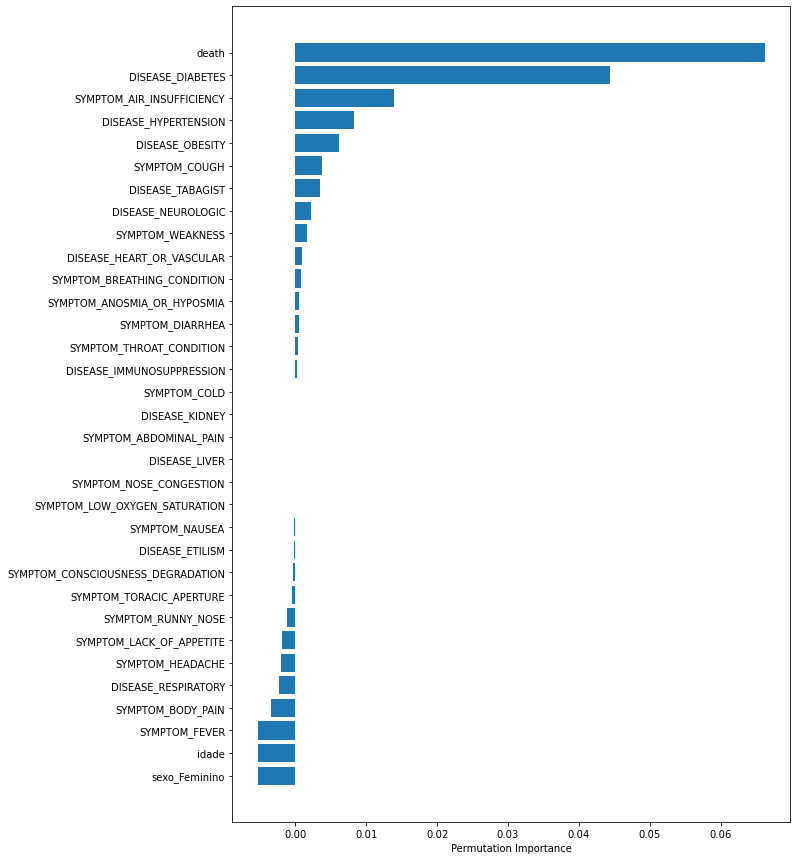

In [70]:
perm_importance = permutation_importance(final_cl_3, X_test_3, y_test_3)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 4 (26/05/2020 até 23/08/2020):

In [31]:
#Periodo 4
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=90)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=180)

df_4 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_4 = df_4.reset_index()
df_4 = df_4.drop("index", axis=1)
df_4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.347826,0,1,2020-05-26
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.695652,0,1,2020-05-26
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0.565217,1,0,2020-05-26
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.200000,1,0,2020-05-26
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.426087,0,1,2020-05-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-08-23
5302,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.417391,0,1,2020-08-23
5303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.521739,1,0,2020-08-23
5304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.095652,0,1,2020-08-23


In [32]:
X_train_oversampled_4, y_train_oversampled_4, X_test_4, y_test_4, mean_test_scores_4, std_test_scores_4, best_scores_4, best_params_4 = apply_model_svc(df_4)

########################################

best_score: 0.8157684951346958
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [33]:
preds_4, final_cl_4 = create_final_cl(X_train_oversampled_4, y_train_oversampled_4, X_test_4, y_test_4, 100, 1, 'rbf')

accuracy_score: 0.6986170720076299
########################################
"""Métricas f1_score:"""
f1:  0.4254545454545455
Macro:  0.6105941117705823
Micro:  0.6986170720076299
weighted:  0.7258097217097469
########################################
"""Métricas precision_score:"""
Precision:  0.33238636363636365
Macro:  0.6080452995496965
Micro:  0.6986170720076299
weighted:  0.7795927060193671


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


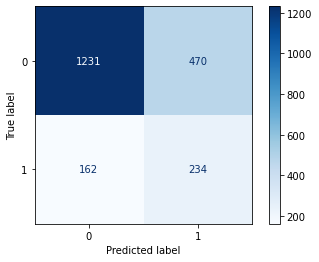

              precision    recall  f1-score   support

           0       0.88      0.72      0.80      1701
           1       0.33      0.59      0.43       396

    accuracy                           0.70      2097
   macro avg       0.61      0.66      0.61      2097
weighted avg       0.78      0.70      0.73      2097



In [34]:
plot_conf_matrix (X_test_4, y_test_4, preds_4, final_cl_4)

roc_auc_score:  0.6573005184116295


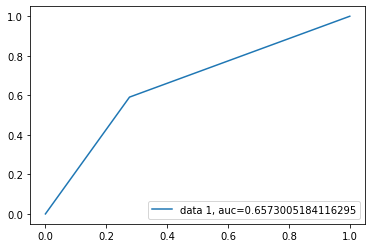

In [35]:
plot_roc_curve(y_test_4, preds_4)

Feature: 0, Score: 0.04575
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.06059
Feature: 3, Score: 0.05005
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00415
Feature: 6, Score: 0.00187
Feature: 7, Score: 0.02174
Feature: 8, Score: 0.01811
Feature: 9, Score: 0.02482
Feature: 10, Score: 0.01886
Feature: 11, Score: 0.00841
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01001
Feature: 14, Score: 0.00120
Feature: 15, Score: 0.00081
Feature: 16, Score: 0.00218
Feature: 17, Score: 0.00520
Feature: 18, Score: 0.00022
Feature: 19, Score: 0.00235
Feature: 20, Score: 0.06586
Feature: 21, Score: 0.02707
Feature: 22, Score: 0.00495
Feature: 23, Score: 0.01321
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00558
Feature: 27, Score: 0.00398
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00532
Feature: 30, Score: 0.10662
Feature: 31, Score: 0.00769
Feature: 32, Score: 0.00769


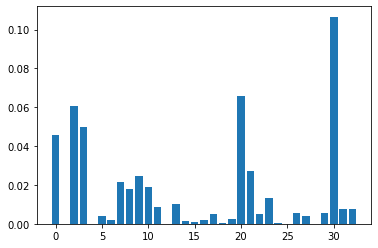

In [37]:
# perform permutation importance
results = permutation_importance(final_cl_4, X_train_oversampled_4, y_train_oversampled_4, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
perm_importance = permutation_importance(final_cl_4, X_test_4, y_test_4)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 5 (25/06/2020 até 22/09/2020):

In [38]:
#Periodo 5
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=120)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=210)

df_5 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_5 = df_5.reset_index()
df_5 = df_5.drop("index", axis=1)
df_5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.330435,1,0,2020-06-25
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026087,0,1,2020-06-25
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.547826,1,0,2020-06-25
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.008696,1,0,2020-06-25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,1,0,2020-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.478261,0,1,2020-09-22
3795,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.660870,0,1,2020-09-22
3796,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.208696,0,1,2020-09-22
3797,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-09-22


In [39]:
X_train_oversampled_5, y_train_oversampled_5, X_test_5, y_test_5, mean_test_scores_5, std_test_scores_5, best_scores_5, best_params_5 = apply_model_svc(df_5)

########################################

best_score: 0.8647363676035906
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [40]:
preds_5, final_cl_5 = create_final_cl(X_train_oversampled_5, y_train_oversampled_5, X_test_5, y_test_5, 100, 1, 'rbf')

accuracy_score: 0.6633941093969145
########################################
"""Métricas f1_score:"""
f1:  0.37336814621409925
Macro:  0.5716313406046527
Micro:  0.6633941093969145
weighted:  0.6962062509650565
########################################
"""Métricas precision_score:"""
Precision:  0.28542914171656686
Macro:  0.5767686249123375
Micro:  0.6633941093969145
weighted:  0.759826252502387


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


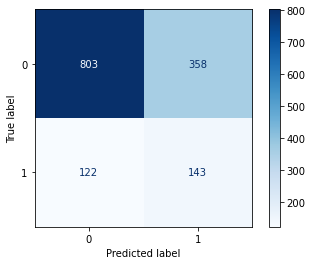

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1161
           1       0.29      0.54      0.37       265

    accuracy                           0.66      1426
   macro avg       0.58      0.62      0.57      1426
weighted avg       0.76      0.66      0.70      1426



In [41]:
plot_conf_matrix (X_test_5, y_test_5, preds_5, final_cl_5)

roc_auc_score:  0.6156338875075164


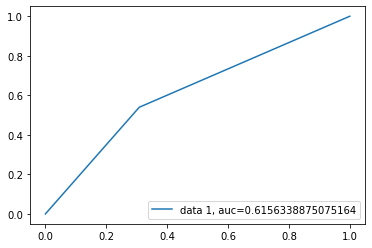

In [42]:
plot_roc_curve(y_test_5, preds_5)

Feature: 0, Score: 0.05367
Feature: 1, Score: 0.00041
Feature: 2, Score: 0.07363
Feature: 3, Score: 0.05713
Feature: 4, Score: -0.00014
Feature: 5, Score: 0.00411
Feature: 6, Score: 0.00201
Feature: 7, Score: 0.01703
Feature: 8, Score: 0.01616
Feature: 9, Score: 0.02401
Feature: 10, Score: 0.01841
Feature: 11, Score: 0.01161
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01002
Feature: 14, Score: 0.00180
Feature: 15, Score: 0.00083
Feature: 16, Score: 0.00111
Feature: 17, Score: 0.00553
Feature: 18, Score: 0.00211
Feature: 19, Score: 0.00298
Feature: 20, Score: 0.06254
Feature: 21, Score: 0.02373
Feature: 22, Score: 0.00718
Feature: 23, Score: 0.01577
Feature: 24, Score: 0.00053
Feature: 25, Score: -0.00025
Feature: 26, Score: 0.01247
Feature: 27, Score: 0.00349
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00758
Feature: 30, Score: 0.12855
Feature: 31, Score: 0.01299
Feature: 32, Score: 0.01299


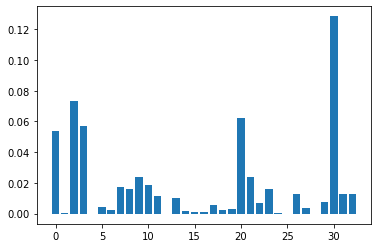

In [43]:
# perform permutation importance
results = permutation_importance(final_cl_5, X_train_oversampled_5, y_train_oversampled_5, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

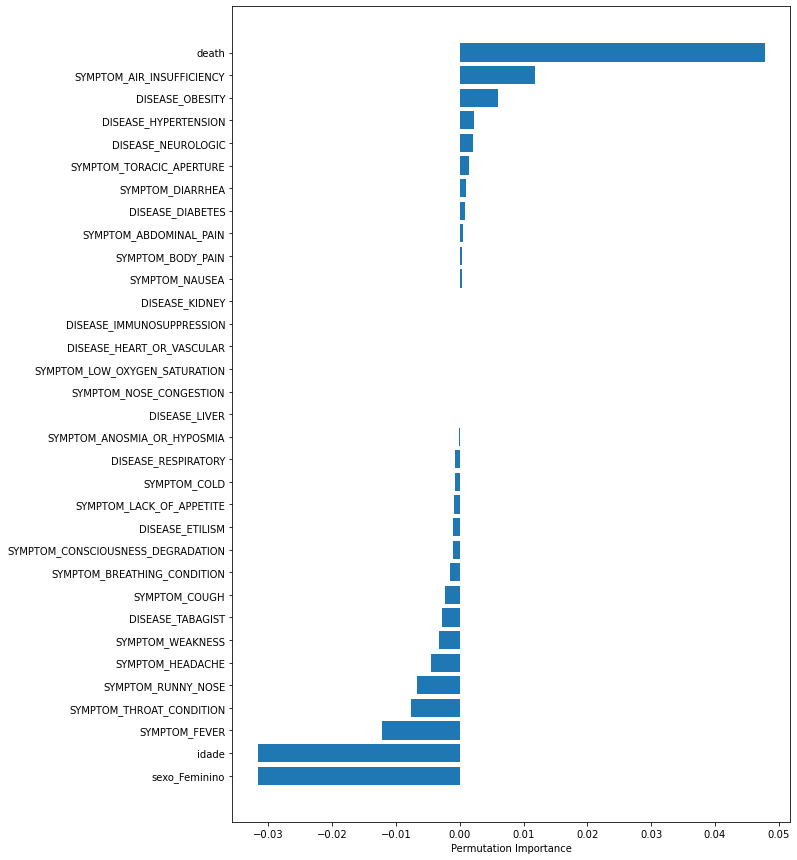

In [71]:
perm_importance = permutation_importance(final_cl_5, X_test_5, y_test_5)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 6 (25/07/2020 até 22/10/2020):

In [44]:
#Periodo 6
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=150)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=240)

df_6 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_6 = df_6.reset_index()
df_6 = df_6.drop("index", axis=1)
df_6

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2020-07-25
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.539130,1,0,2020-07-25
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.373913,1,0,2020-07-25
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.478261,1,0,2020-07-25
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.660870,1,0,2020-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.495652,1,0,2020-10-22
2782,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.747826,1,0,2020-10-22
2783,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.434783,0,1,2020-10-22
2784,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.608696,1,0,2020-10-22


In [45]:
X_train_oversampled_6, y_train_oversampled_6, X_test_6, y_test_6, mean_test_scores_6, std_test_scores_6, best_scores_6, best_params_6 = apply_model_svc(df_6)

########################################

best_score: 0.887590775424898
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [46]:
preds_6, final_cl_6 = create_final_cl(X_train_oversampled_6, y_train_oversampled_6, X_test_6, y_test_6, 10, 1, 'rbf')

accuracy_score: 0.6348884381338742
########################################
"""Métricas f1_score:"""
f1:  0.40983606557377045
Macro:  0.5727594424785151
Micro:  0.6348884381338742
weighted:  0.6586825215763521
########################################
"""Métricas precision_score:"""
Precision:  0.33156498673740054
Macro:  0.5771125426297841
Micro:  0.6348884381338742
weighted:  0.7066102394492966


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


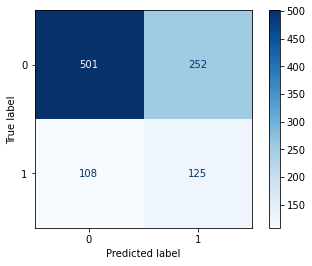

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       753
           1       0.33      0.54      0.41       233

    accuracy                           0.63       986
   macro avg       0.58      0.60      0.57       986
weighted avg       0.71      0.63      0.66       986



In [47]:
plot_conf_matrix (X_test_6, y_test_6, preds_6, final_cl_6)

roc_auc_score:  0.6009096660568028


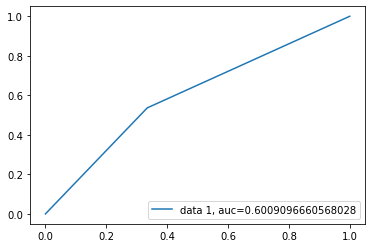

In [48]:
plot_roc_curve(y_test_6, preds_6)

Feature: 0, Score: 0.04748
Feature: 1, Score: 0.00021
Feature: 2, Score: 0.05492
Feature: 3, Score: 0.04254
Feature: 4, Score: -0.00019
Feature: 5, Score: 0.00606
Feature: 6, Score: 0.00272
Feature: 7, Score: 0.01057
Feature: 8, Score: 0.01530
Feature: 9, Score: 0.01188
Feature: 10, Score: 0.01415
Feature: 11, Score: 0.01656
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00830
Feature: 14, Score: 0.00101
Feature: 15, Score: 0.00050
Feature: 16, Score: 0.00079
Feature: 17, Score: 0.00590
Feature: 18, Score: 0.00183
Feature: 19, Score: 0.00132
Feature: 20, Score: 0.05661
Feature: 21, Score: 0.02422
Feature: 22, Score: 0.00567
Feature: 23, Score: 0.01584
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01279
Feature: 27, Score: 0.00476
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00198
Feature: 30, Score: 0.10347
Feature: 31, Score: 0.01157
Feature: 32, Score: 0.01157


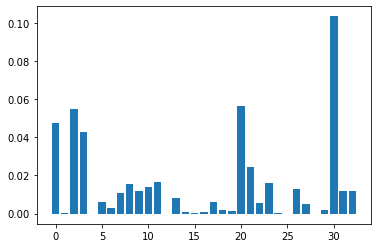

In [49]:
# perform permutation importance
results = permutation_importance(final_cl_6, X_train_oversampled_6, y_train_oversampled_6, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

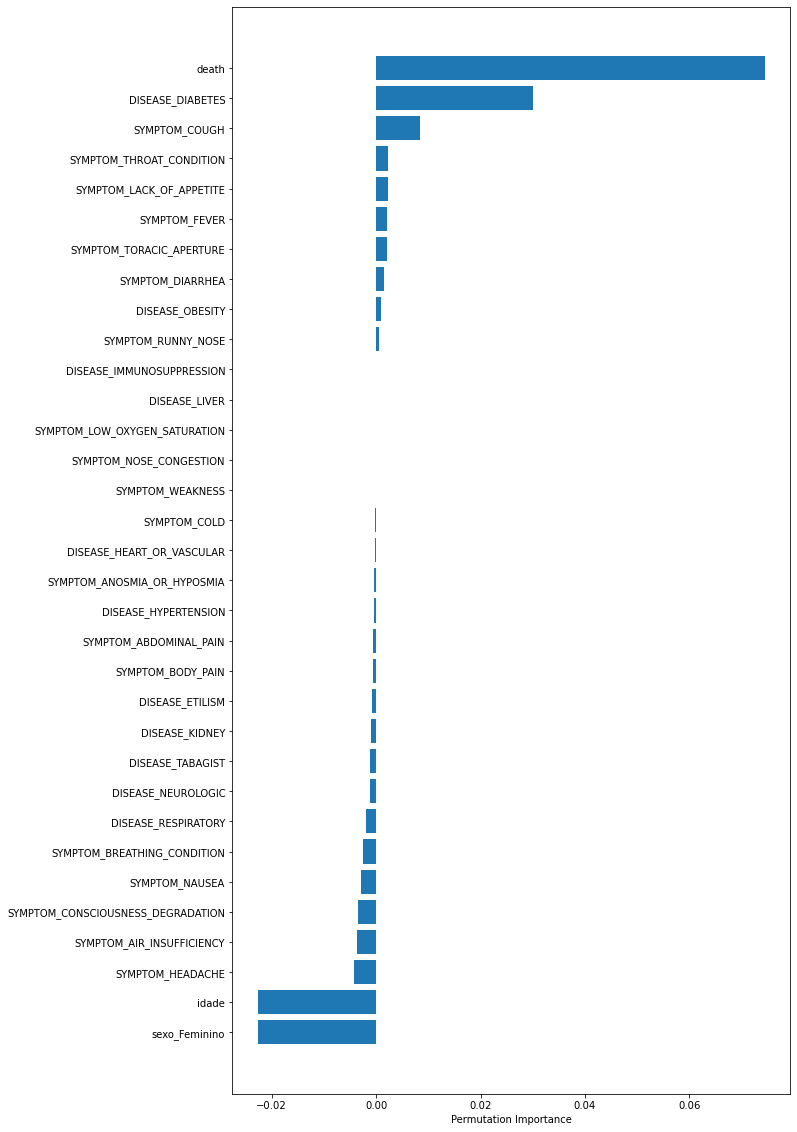

In [66]:
perm_importance = permutation_importance(final_cl_6, X_test_6, y_test_6)

feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")


In [67]:
"""feature_names = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS',
'SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE','SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION',
'DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY',
'DISEASE_IMMUNOSUPPRESSION','DISEASE_TABAGIST', 'DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao' ]

f_importances(abs(final_cl_6.coef_[0]), feature_names, top=10)"""

'feature_names = ["SYMPTOM_COUGH",\'SYMPTOM_COLD\',\'SYMPTOM_AIR_INSUFFICIENCY\',\'SYMPTOM_FEVER\',\'SYMPTOM_LOW_OXYGEN_SATURATION\',\'SYMPTOM_BREATHING_CONDITION\',\'SYMPTOM_TORACIC_APERTURE\',\'SYMPTOM_THROAT_CONDITION\',\n\'SYMPTOM_HEADACHE\',\'SYMPTOM_BODY_PAIN\',\'SYMPTOM_DIARRHEA\',\'SYMPTOM_RUNNY_NOSE\',\'SYMPTOM_NOSE_CONGESTION\',\'SYMPTOM_WEAKNESS\',\n\'SYMPTOM_ANOSMIA_OR_HYPOSMIA\',\'SYMPTOM_NAUSEA\',\'SYMPTOM_LACK_OF_APPETITE\',\'SYMPTOM_ABDOMINAL_PAIN\',\'SYMPTOM_CONSCIOUSNESS_DEGRADATION\',\n\'DISEASE_HEART_OR_VASCULAR\',\'DISEASE_DIABETES\',\'DISEASE_HYPERTENSION\',\'DISEASE_RESPIRATORY\',\'DISEASE_OBESITY\',\'DISEASE_KIDNEY\',\n\'DISEASE_IMMUNOSUPPRESSION\',\'DISEASE_TABAGIST\', \'DISEASE_ETILISM\',\'DISEASE_LIVER\',\'DISEASE_NEUROLOGIC\',\'death\', \'idade\', \'sexo_Feminino\',\'sexo_Masculino\', \'data_notificacao\' ]\n\nf_importances(abs(final_cl_6.coef_[0]), feature_names, top=10)'

### Teste com o Período 6 (24/08/2020 até 21/11/2020):

In [72]:
#Periodo 7
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=180)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=270)

df_7 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_7 = df_7.reset_index()
df_7 = df_7.drop("index", axis=1)
df_7

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,0,1,2020-08-24
1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.217391,1,0,2020-08-24
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,1,0,2020-08-24
3,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.017391,1,0,2020-08-24
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.678261,0,1,2020-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.486957,0,1,2020-11-21
2289,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.373913,1,0,2020-11-21
2290,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.313043,0,1,2020-11-21
2291,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,0,1,2020-11-21


In [73]:
X_train_oversampled_7, y_train_oversampled_7, X_test_7, y_test_7, mean_test_scores_7, std_test_scores_7, best_scores_7, best_params_7 = apply_model_svc(df_7)

########################################

best_score: 0.8627372546914011
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [74]:
preds_7, final_cl_7 = create_final_cl(X_train_oversampled_7, y_train_oversampled_7, X_test_7, y_test_7, 10, 1, 'rbf')

accuracy_score: 0.6311858076563959
########################################
"""Métricas f1_score:"""
f1:  0.3837753510140406
Macro:  0.5603087281385992
Micro:  0.6311858076563959
weighted:  0.6346472464235441
########################################
"""Métricas precision_score:"""
Precision:  0.3716012084592145
Macro:  0.559449252878256
Micro:  0.6311858076563959
weighted:  0.6385523976336133


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


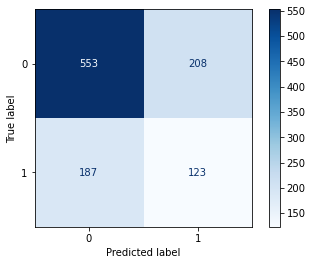

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       761
           1       0.37      0.40      0.38       310

    accuracy                           0.63      1071
   macro avg       0.56      0.56      0.56      1071
weighted avg       0.64      0.63      0.63      1071



In [75]:
plot_conf_matrix (X_test_7, y_test_7, preds_7, final_cl_7)

roc_auc_score:  0.5617248103090161


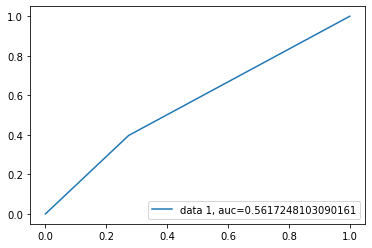

In [76]:
plot_roc_curve(y_test_7, preds_7)

Feature: 0, Score: 0.05887
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.04653
Feature: 3, Score: 0.06066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00510
Feature: 6, Score: 0.00136
Feature: 7, Score: 0.01191
Feature: 8, Score: 0.01235
Feature: 9, Score: 0.01977
Feature: 10, Score: 0.01945
Feature: 11, Score: 0.00972
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01503
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00019
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00493
Feature: 18, Score: 0.00156
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.07419
Feature: 21, Score: 0.01055
Feature: 22, Score: 0.00730
Feature: 23, Score: 0.01599
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02060
Feature: 27, Score: 0.00267
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00856
Feature: 30, Score: 0.11852
Feature: 31, Score: 0.01600
Feature: 32, Score: 0.01600


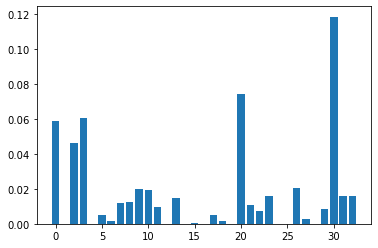

In [77]:
# perform permutation importance
results = permutation_importance(final_cl_7, X_train_oversampled_7, y_train_oversampled_7, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Text(0.5, 0, 'Permutation Importance')

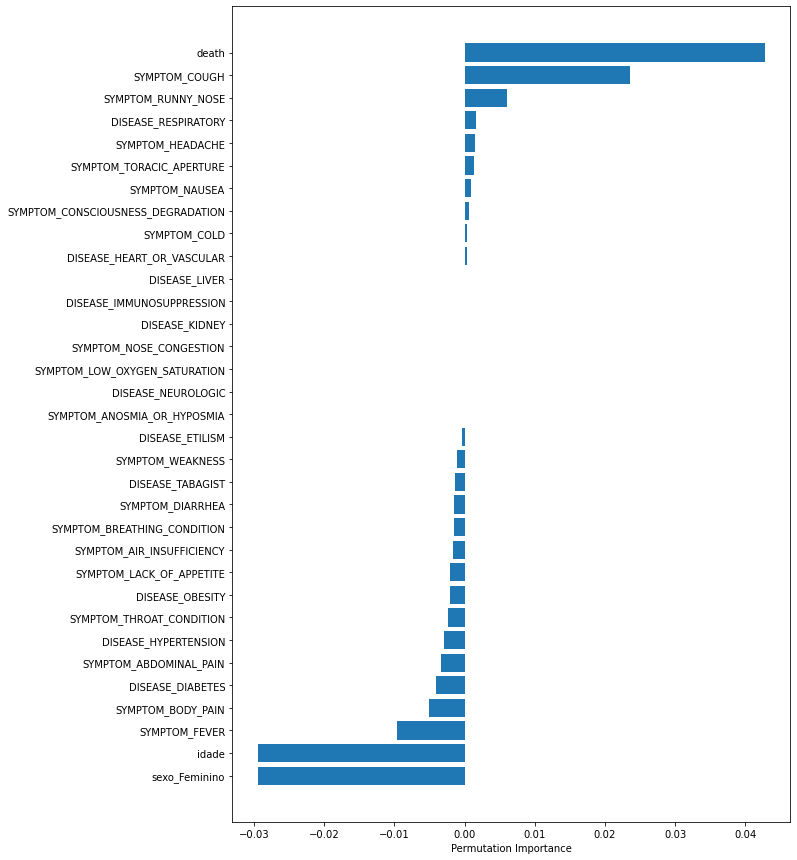

In [78]:
perm_importance = permutation_importance(final_cl_7, X_test_7, y_test_7)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 8 (23/09/2020 até 21/12/2020):

In [79]:
#Periodo 8
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=210)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=300)

df_8 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_8 = df_8.reset_index()
df_8 = df_8.drop("index", axis=1)
df_8

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2020-09-23
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.052174,0,1,2020-09-23
2,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0.339130,0,1,2020-09-23
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.539130,1,0,2020-09-23
4,1,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0.486957,0,1,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.591304,0,1,2020-12-21
2357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.573913,0,1,2020-12-21
2358,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.739130,1,0,2020-12-21
2359,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0.504348,0,1,2020-12-21


In [80]:
X_train_oversampled_8, y_train_oversampled_8, X_test_8, y_test_8, mean_test_scores_8, std_test_scores_8, best_scores_8, best_params_8 = apply_model_svc(df_8)

########################################

best_score: 0.8456671947226647
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [81]:
preds_8, final_cl_8 = create_final_cl(X_train_oversampled_8, y_train_oversampled_8, X_test_8, y_test_8, 100, 1, 'rbf')

accuracy_score: 0.6520719311962471
########################################
"""Métricas f1_score:"""
f1:  0.45797807551766134
Macro:  0.6008946220996482
Micro:  0.6520719311962471
weighted:  0.6492784099573498
########################################
"""Métricas precision_score:"""
Precision:  0.4723618090452261
Macro:  0.6028097353966199
Micro:  0.6520719311962471
weighted:  0.6469723250058095


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


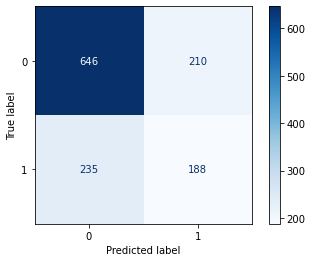

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       856
           1       0.47      0.44      0.46       423

    accuracy                           0.65      1279
   macro avg       0.60      0.60      0.60      1279
weighted avg       0.65      0.65      0.65      1279



In [82]:
plot_conf_matrix (X_test_8, y_test_8, preds_8, final_cl_8)

roc_auc_score:  0.5995586708203531


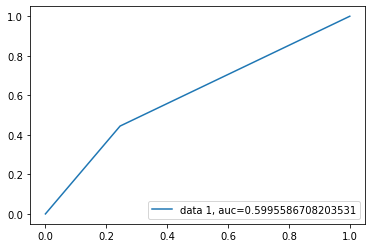

In [83]:
plot_roc_curve(y_test_8, preds_8)

Feature: 0, Score: 0.05639
Feature: 1, Score: 0.00106
Feature: 2, Score: 0.03994
Feature: 3, Score: 0.05920
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00238
Feature: 6, Score: 0.00052
Feature: 7, Score: 0.01431
Feature: 8, Score: 0.01883
Feature: 9, Score: 0.02887
Feature: 10, Score: 0.01939
Feature: 11, Score: 0.01441
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01477
Feature: 14, Score: 0.00059
Feature: 15, Score: 0.00014
Feature: 16, Score: 0.00356
Feature: 17, Score: 0.00485
Feature: 18, Score: 0.00214
Feature: 19, Score: -0.00032
Feature: 20, Score: 0.07240
Feature: 21, Score: 0.01417
Feature: 22, Score: 0.00436
Feature: 23, Score: 0.00757
Feature: 24, Score: 0.00033
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01130
Feature: 27, Score: 0.00611
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00725
Feature: 30, Score: 0.12412
Feature: 31, Score: -0.00677
Feature: 32, Score: -0.00677


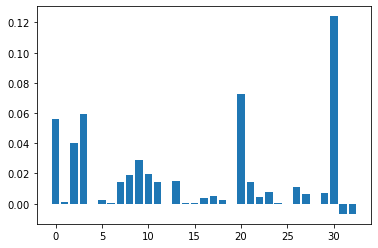

In [84]:
# perform permutation importance
results = permutation_importance(final_cl_8, X_train_oversampled_8, y_train_oversampled_8, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

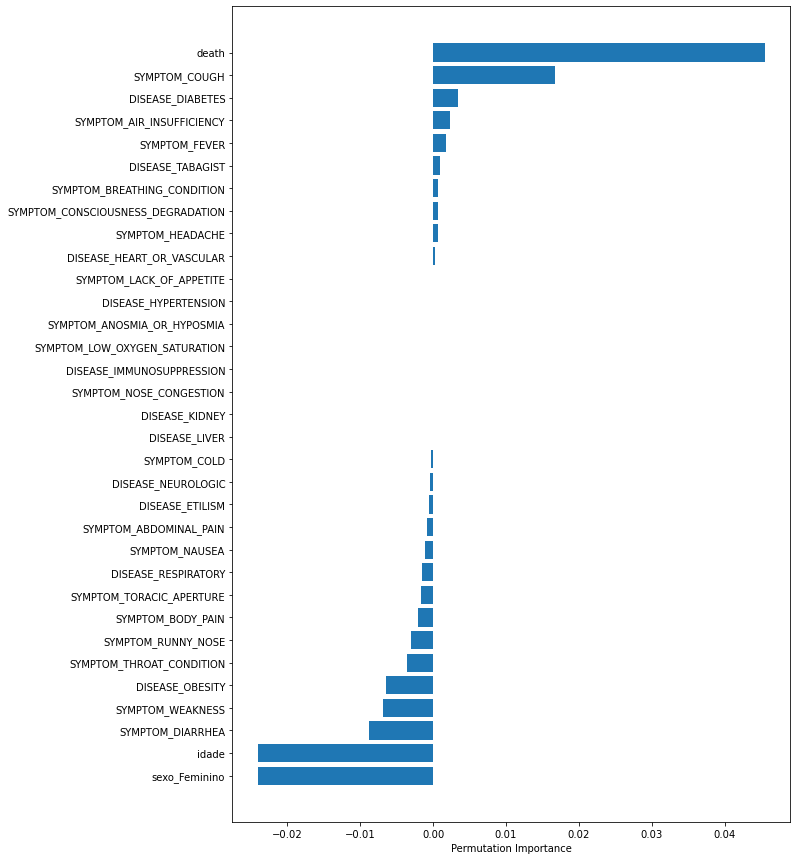

In [85]:
perm_importance = permutation_importance(final_cl_8, X_test_8, y_test_8)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 9 (23/10/2020 até 20/01/2021):

In [86]:
#Periodo 9
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=240)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=330)

df_9 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_9 = df_9.reset_index()
df_9 = df_9.drop("index", axis=1)
df_9

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.530435,1,0,2020-10-23
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2020-10-23
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.130435,1,0,2020-10-23
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.034783,0,1,2020-10-23
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.530435,0,1,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,0,1,2021-01-20
2653,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0.391304,1,0,2021-01-20
2654,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.869565,0,1,2021-01-20
2655,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.634783,1,0,2021-01-20


In [87]:
X_train_oversampled_9, y_train_oversampled_9, X_test_9, y_test_9, mean_test_scores_9, std_test_scores_9, best_scores_9, best_params_9 = apply_model_svc(df_9)

########################################

best_score: 0.8480478655959425
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [88]:
preds_9, final_cl_9 = create_final_cl(X_train_oversampled_9, y_train_oversampled_9, X_test_9, y_test_9, 100, 0.1, 'rbf')

accuracy_score: 0.6811492641906096
########################################
"""Métricas f1_score:"""
f1:  0.5751633986928104
Macro:  0.6599877565533598
Micro:  0.6811492641906096
weighted:  0.6859641016024558
########################################
"""Métricas precision_score:"""
Precision:  0.5347222222222222
Macro:  0.6574903708055881
Micro:  0.6811492641906096
weighted:  0.6950865032028769


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


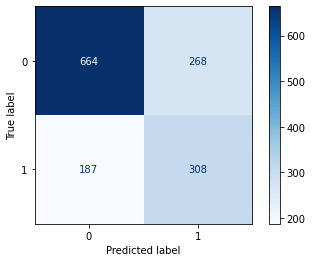

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       932
           1       0.53      0.62      0.58       495

    accuracy                           0.68      1427
   macro avg       0.66      0.67      0.66      1427
weighted avg       0.70      0.68      0.69      1427



In [89]:
plot_conf_matrix (X_test_9, y_test_9, preds_9, final_cl_9)

roc_auc_score:  0.6673342870767763


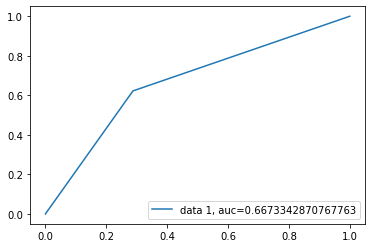

In [90]:
plot_roc_curve(y_test_9, preds_9)

Feature: 0, Score: 0.05252
Feature: 1, Score: 0.00069
Feature: 2, Score: 0.02917
Feature: 3, Score: 0.06748
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00559
Feature: 6, Score: 0.00126
Feature: 7, Score: 0.02224
Feature: 8, Score: 0.02885
Feature: 9, Score: 0.01553
Feature: 10, Score: 0.03018
Feature: 11, Score: 0.03012
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01393
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00069
Feature: 16, Score: 0.00452
Feature: 17, Score: 0.00621
Feature: 18, Score: 0.00197
Feature: 19, Score: 0.00149
Feature: 20, Score: 0.04027
Feature: 21, Score: 0.01590
Feature: 22, Score: 0.00486
Feature: 23, Score: 0.01857
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.01835
Feature: 27, Score: 0.00438
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00857
Feature: 30, Score: 0.09526
Feature: 31, Score: 0.01396
Feature: 32, Score: 0.01396


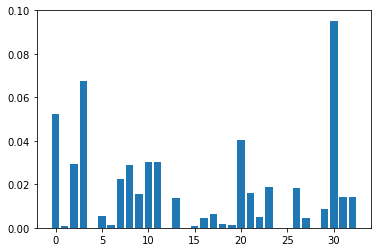

In [91]:
# perform permutation importance
results = permutation_importance(final_cl_9, X_train_oversampled_9, y_train_oversampled_9, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

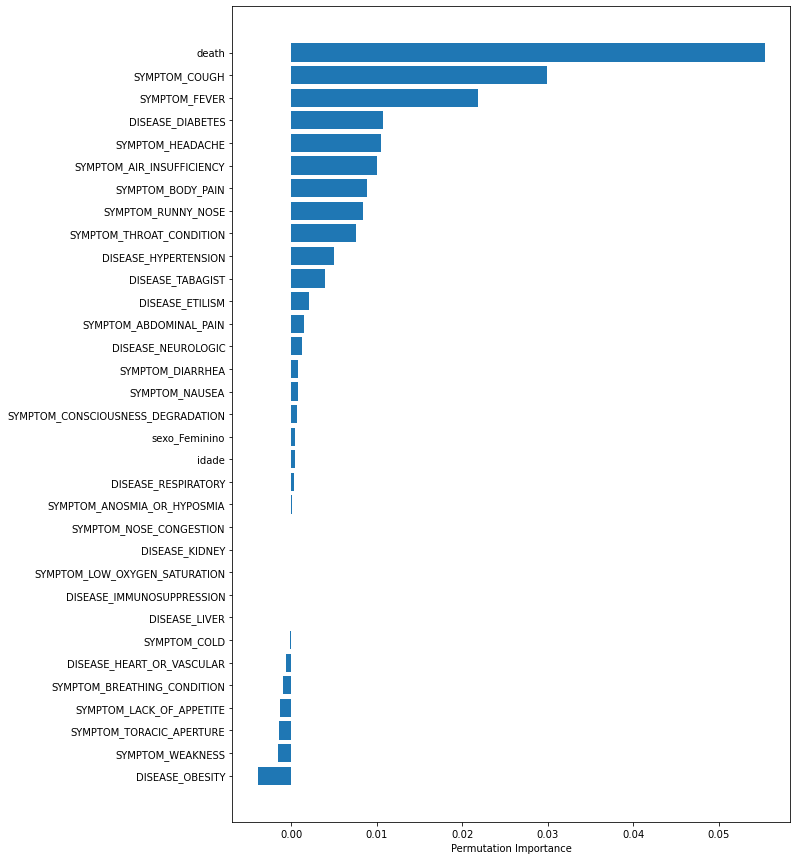

In [92]:
perm_importance = permutation_importance(final_cl_9, X_test_9, y_test_9)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")

### Teste com o Período 10 (22/11/2020 até 19/02/2021):

In [93]:
#Periodo 10
data_inicio = df['data_notificacao'][0]+pd.Timedelta(days=270)
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=360)

df_10 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]
df_10 = df_10.reset_index()
df_10 = df_10.drop("index", axis=1)
df_10

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.608696,1,0,2020-11-22
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.713043,1,0,2020-11-22
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.643478,1,0,2020-11-22
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.469565,1,0,2020-11-22
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.304348,1,0,2020-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.660870,1,0,2021-02-19
2812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.634783,1,0,2021-02-19
2813,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2021-02-19
2814,1,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.460870,0,1,2021-02-19


In [94]:
X_train_oversampled_10, y_train_oversampled_10, X_test_10, y_test_10, mean_test_scores_10, std_test_scores_10, best_scores_10, best_params_10 = apply_model_svc(df_10)

########################################

best_score: 0.8328337083264549
best_params_: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
########################################



In [95]:
preds_10, final_cl_10 = create_final_cl(X_train_oversampled_10, y_train_oversampled_10, X_test_10, y_test_10, 10, 1, 'rbf')

accuracy_score: 0.6770098730606487
########################################
"""Métricas f1_score:"""
f1:  0.5465346534653466
Macro:  0.6478565928882045
Micro:  0.6770098730606487
weighted:  0.6804396707279953
########################################
"""Métricas precision_score:"""
Precision:  0.5217391304347826
Macro:  0.6455714774783587
Micro:  0.6770098730606487
weighted:  0.6853934452159263


c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


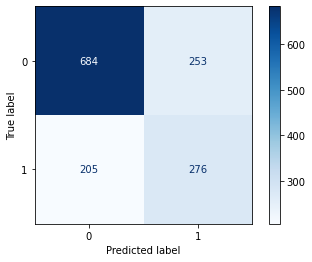

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       937
           1       0.52      0.57      0.55       481

    accuracy                           0.68      1418
   macro avg       0.65      0.65      0.65      1418
weighted avg       0.69      0.68      0.68      1418

roc_auc_score:  0.6518969507229913


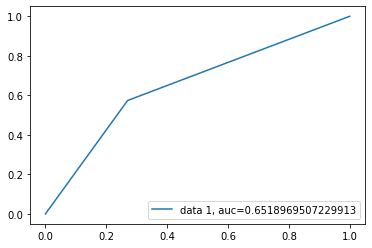

In [96]:
plot_conf_matrix (X_test_10, y_test_10, preds_10, final_cl_10)

plot_roc_curve(y_test_10, preds_10)

Text(0.5, 0, 'Permutation Importance')

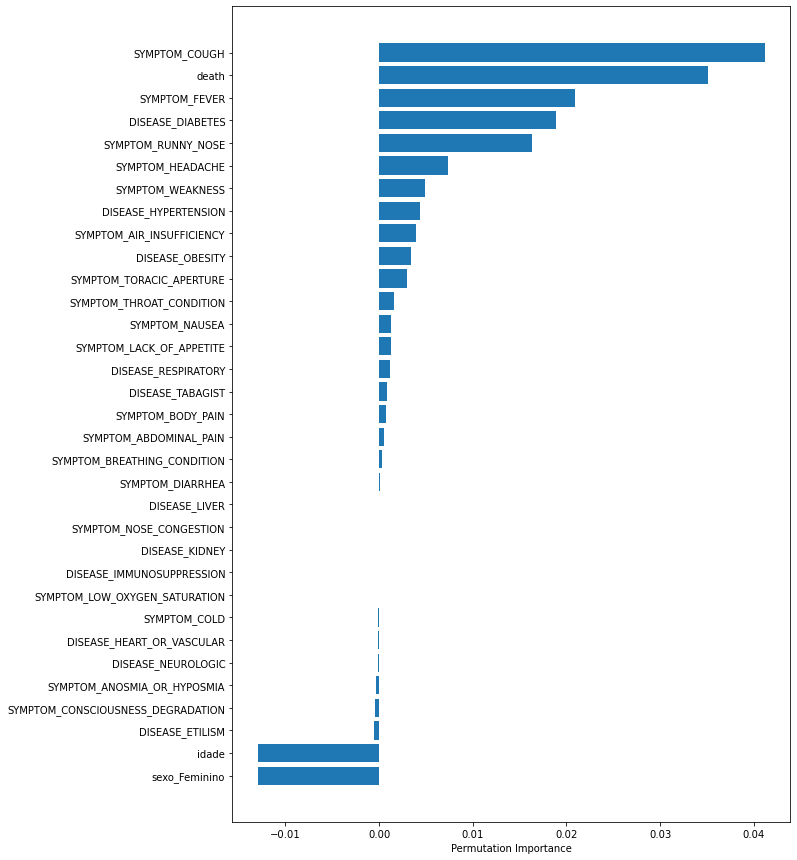

In [97]:
perm_importance = permutation_importance(final_cl_10, X_test_10, y_test_10)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], height=0.8)
plt.xlabel("Permutation Importance")